In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("./data/Dataset.csv")

In [3]:
df.head()

,Food,Calories/100g,Fat/100g,Carbohydrates/100g,Protein/100g,Cholesterol/100g,Sodium/100g
0,Nuts,614.3,53.6,21.4,20.4,0.0,275.0
1,Seeds,550.0,43.0,30.0,19.0,0.0,31.0
2,Cookie,493.3,24.7,66.7,5.0,0.0,310.0
3,Kind bar,450.0,37.5,40.0,15.0,0.0,350.0
4,Kind oats and honey,428.6,14.3,65.7,8.6,0.0,271.4


In [4]:
#checking null values
print(df.isnull().sum())

Food                   0
Calories/100g          0
Fat/100g               0
Carbohydrates/100g     0
Protein/100g           0
Cholesterol/100g      10
Sodium/100g           10
dtype: int64


In [5]:
#imputing 0 for null in Cholesterol/100g and Sodium/100g
df[['Cholesterol/100g', 'Sodium/100g']] = df[['Cholesterol/100g', 'Sodium/100g']].fillna(0)

In [6]:
#verifying all columns filled
print(df.isnull().sum())

Food                  0
Calories/100g         0
Fat/100g              0
Carbohydrates/100g    0
Protein/100g          0
Cholesterol/100g      0
Sodium/100g           0
dtype: int64


In [7]:
# Standardizing the data, dropping non-numeric feature "Food"
features = df.drop(columns='Food')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [8]:
# Performing PCA
pca = PCA()
pca.fit_transform(scaled_features)

array([[-1.57277354e+00,  3.17180806e+00, -8.12711832e-01,
        -3.67528586e-01, -1.17937457e+00,  1.71925144e-02],
       [-1.37059204e+00,  1.98841623e+00, -1.42413244e+00,
        -4.81490430e-01, -8.53900184e-01,  4.21649817e-02],
       [-1.76723061e+00,  3.85385097e-01,  4.52397845e-01,
         3.01024489e-01,  1.11666523e-01,  1.19808967e-03],
       ...,
       [ 2.19422542e+00,  1.58766865e+00, -1.62619456e+00,
        -6.24749243e-02,  6.45920459e-01, -3.85792876e-02],
       [-9.08138871e-01, -1.18744494e+00, -3.54958689e-01,
        -2.31584856e-01,  4.80456611e-01,  3.64962045e-02],
       [-8.39888389e-01,  1.74876693e-01, -8.72623126e-01,
        -8.57357143e-01,  1.40819324e-01,  1.86695244e-02]])

In [9]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

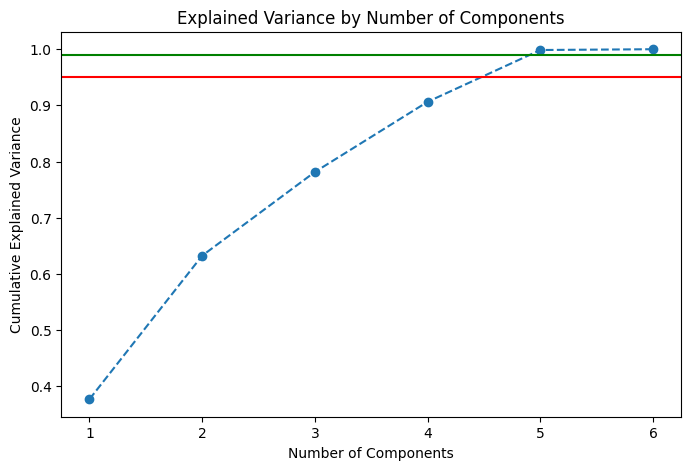

In [10]:
# Plotting cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axhline(y=0.99, color='g', linestyle='-')
plt.show()

In [11]:
for i, evr in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1} variance explained: {evr*100:.2f}%")

Principal Component 1 variance explained: 37.68%
Principal Component 2 variance explained: 25.56%
Principal Component 3 variance explained: 14.91%
Principal Component 4 variance explained: 12.49%
Principal Component 5 variance explained: 9.22%
Principal Component 6 variance explained: 0.14%


## First big drop of proportion of variance is between PC2 and PC3, so try 2 principal components?

In [12]:
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

In [13]:
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)
pca_df = pd.concat([df[['Food']], pca_df], axis=1)

In [14]:
#pca_df.to_csv('data_with_prinicipal')

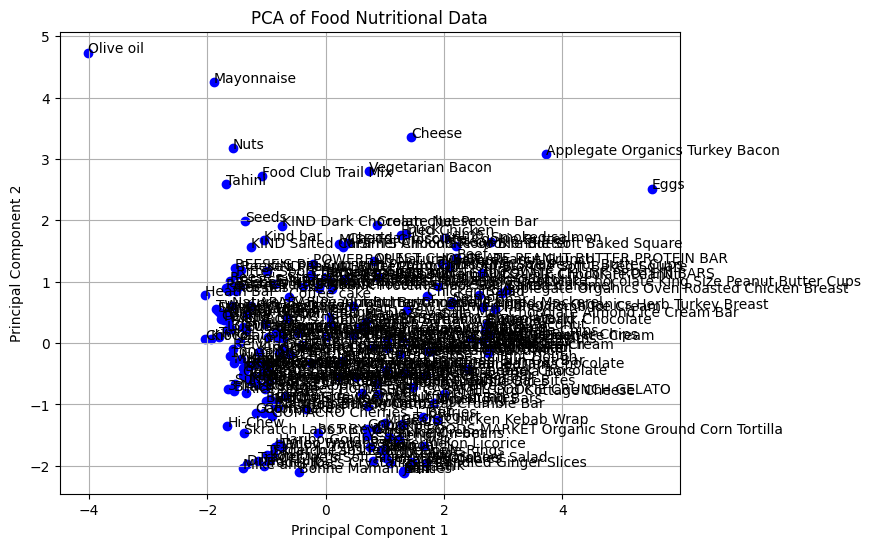

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue')
for i, food in enumerate(pca_df['Food']):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], food)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Food Nutritional Data')
plt.grid()
plt.show()

In [16]:
loadings_pc1 = pca.components_[0]
loadings_pc2 = pca.components_[1]

loadings_df_pc1 = pd.DataFrame(loadings_pc1, index=features.columns, columns=['PC1'])
loadings_df_pc2 = pd.DataFrame(loadings_pc2, index=features.columns, columns=['PC2'])

print("Loadings for PC1:")
print(loadings_df_pc1)
print("\n")
print("Loadings for PC2:")
print(loadings_df_pc2)


Loadings for PC1:
                         PC1
Calories/100g      -0.574599
Fat/100g           -0.331135
Carbohydrates/100g -0.547830
Protein/100g        0.285645
Cholesterol/100g    0.410549
Sodium/100g         0.099615


Loadings for PC2:
                         PC2
Calories/100g       0.371257
Fat/100g            0.619088
Carbohydrates/100g -0.243986
Protein/100g        0.426020
Cholesterol/100g    0.304522
Sodium/100g         0.380976


In [17]:
pca_df

,Food,PC1,PC2
0,Nuts,-1.572774,3.171808
1,Seeds,-1.370592,1.988416
2,Cookie,-1.767231,0.385385
3,Kind bar,-1.050426,1.680369
4,Kind oats and honey,-1.130156,-0.143045
...,...,...,...
204,GOMACRO Mocha Chocolate Chip,-0.769131,-0.177224
205,MISFITS Chocolate Cookie Butter,0.294113,1.558711
206,Steak,2.194225,1.587669
207,GOMACRO Cherries + Berries,-0.908139,-1.187445


In [18]:
n_clusters = 3
kmeans1 = KMeans(n_clusters=n_clusters, random_state=23)
kmeans1.fit(principal_components)
pca_df['Cluster_3'] = kmeans1.labels_

/Users/maxwellkreitman/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


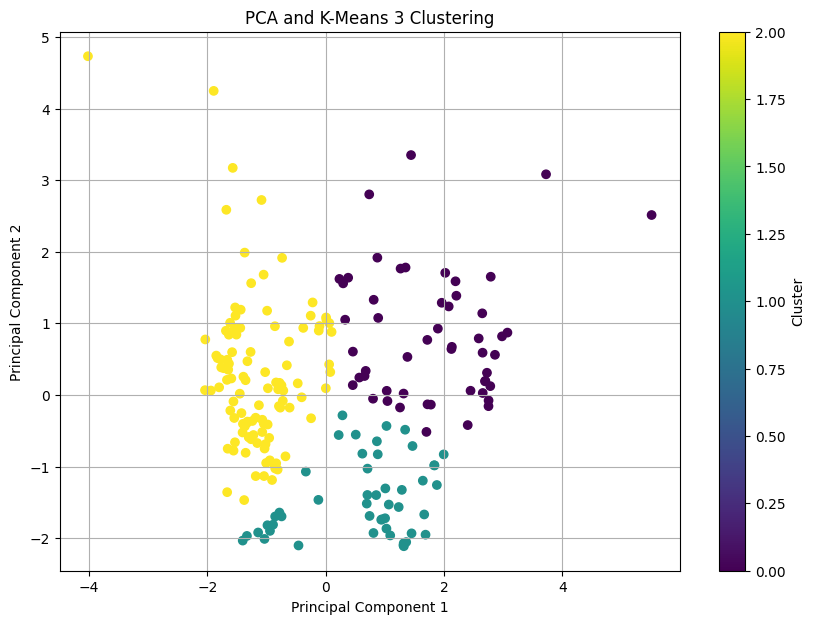

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster_3'], cmap='viridis', marker='o')
#for i, txt in enumerate(pca_df['Food']):
#    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means 3 Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [20]:
n_clusters = 4
kmeans2 = KMeans(n_clusters=n_clusters, random_state=23)
kmeans2.fit(principal_components)
pca_df['Cluster_4'] = kmeans1.labels_

/Users/maxwellkreitman/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


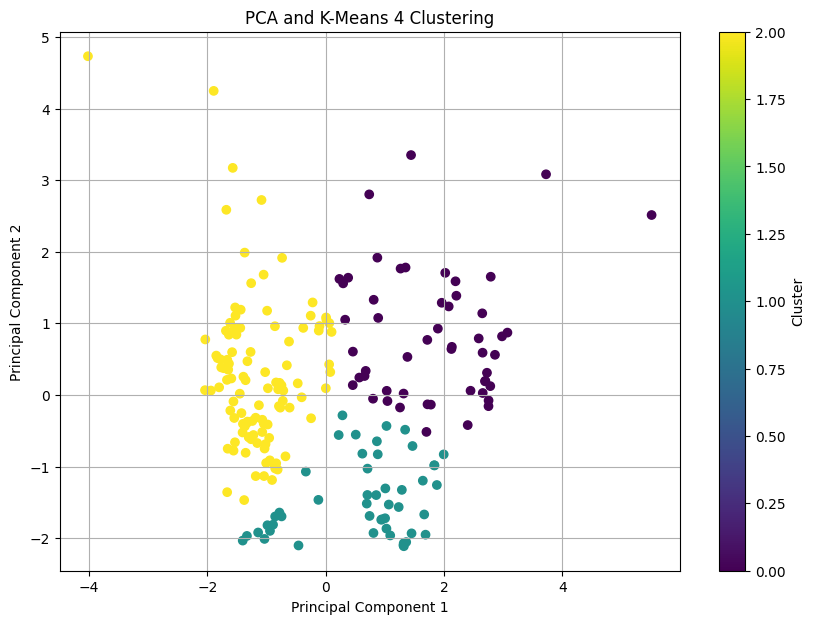

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster_4'], cmap='viridis', marker='o')
#for i, txt in enumerate(pca_df['Food']):
#    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means 4 Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [22]:
for cluster_id in range(n_clusters):
    cluster_records = pca_df[pca_df['Cluster_3'] == cluster_id]['Food']
    print(f"Records in Cluster {cluster_id + 1}: {', '.join(cluster_records)}\n")

Records in Cluster 1: Cheese, Duck, Lamb, Beef, Salmon, Trout, Carb-conscious tortilla, Chicken, Eggs, Tuna, Sea bass, Turkey, Halibut, Cod, Light mayonnaise, CAVA Custom Salad, Fried Chicken, Ricotta cheese, Fried Cod, Tempeh, Canned Mackerel, Canned Salmon, Canned Tuna, Vegetarian Bacon, Applegate Organics Oven Roasted Chicken Breast, Applegate Organics Herb Turkey Breast, Applegate Organics Turkey Bacon, Flounder, POWERBAR Protein Nut 2 Milk Chocolate Peanut, Cream cheese, Branzino, Mackerel, Vegetarian Samosa, Pizza, QUEST CHOCOLATE PEANUT BUTTER PROTEIN BAR, QUEST MINT CHOCOLATE CHUNK PROTEIN BARS, Smoked salmon, Cheddar biscuit, Green Curry Chicken, POWERBAR 30% Vanilla Coconut, POWERBAR 30% Chocolate, Chicken Salad, Arctic Char, Van Leeuwen Honeycomb Ice Cream, HAAGEN-DAZS Vanilla Bean Ice Cream, HAAGEN-DAZS Coffee Ice Cream, Whitefish salad, Labneh, Sturgeon, MISFITS Chocolate Cookie Butter, MISFITS Chocolate Cookie Butter, Steak

Records in Cluster 2: Homemade oat bar 2, Farro

In [23]:
kmeans1 = KMeans(n_clusters=3, random_state=23)
kmeans1.fit(principal_components)
pca_df['Cluster_3'] = kmeans1.labels_

/Users/maxwellkreitman/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
for cluster_id in range(n_clusters):
    cluster_records = pca_df[pca_df['Cluster_4'] == cluster_id]['Food']
    print(f"Records in Cluster {cluster_id+1}: {', '.join(cluster_records)}\n")

Records in Cluster 1: Cheese, Duck, Lamb, Beef, Salmon, Trout, Carb-conscious tortilla, Chicken, Eggs, Tuna, Sea bass, Turkey, Halibut, Cod, Light mayonnaise, CAVA Custom Salad, Fried Chicken, Ricotta cheese, Fried Cod, Tempeh, Canned Mackerel, Canned Salmon, Canned Tuna, Vegetarian Bacon, Applegate Organics Oven Roasted Chicken Breast, Applegate Organics Herb Turkey Breast, Applegate Organics Turkey Bacon, Flounder, POWERBAR Protein Nut 2 Milk Chocolate Peanut, Cream cheese, Branzino, Mackerel, Vegetarian Samosa, Pizza, QUEST CHOCOLATE PEANUT BUTTER PROTEIN BAR, QUEST MINT CHOCOLATE CHUNK PROTEIN BARS, Smoked salmon, Cheddar biscuit, Green Curry Chicken, POWERBAR 30% Vanilla Coconut, POWERBAR 30% Chocolate, Chicken Salad, Arctic Char, Van Leeuwen Honeycomb Ice Cream, HAAGEN-DAZS Vanilla Bean Ice Cream, HAAGEN-DAZS Coffee Ice Cream, Whitefish salad, Labneh, Sturgeon, MISFITS Chocolate Cookie Butter, MISFITS Chocolate Cookie Butter, Steak

Records in Cluster 2: Homemade oat bar 2, Farro

In [25]:
n_clusters = 5
kmeans3 = KMeans(n_clusters=n_clusters, random_state=23)
kmeans3.fit(principal_components)
pca_df['Cluster_5'] = kmeans3.labels_

/Users/maxwellkreitman/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


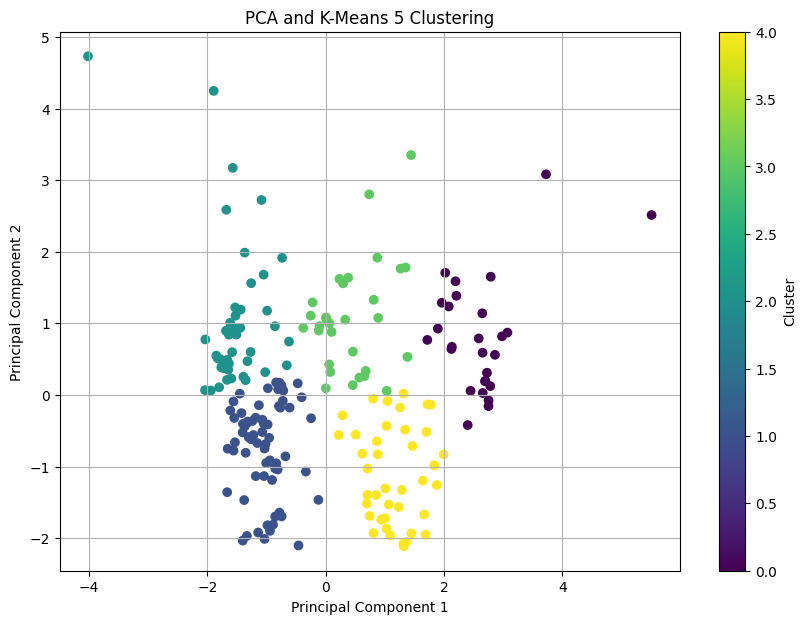

In [26]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster_5'], cmap='viridis', marker='o')
#for i, txt in enumerate(pca_df['Food']):
#    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means 5 Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [27]:
for cluster_id in range(n_clusters):
    cluster_records = pca_df[pca_df['Cluster_5'] == cluster_id]['Food']
    print(f"Records in Cluster {cluster_id+1}: {', '.join(cluster_records)}\n")

Records in Cluster 1: Lamb, Beef, Salmon, Trout, Chicken, Eggs, Tuna, Sea bass, Turkey, Halibut, Cod, Fried Cod, Canned Mackerel, Canned Salmon, Canned Tuna, Applegate Organics Oven Roasted Chicken Breast, Applegate Organics Herb Turkey Breast, Applegate Organics Turkey Bacon, Flounder, Branzino, Mackerel, Smoked salmon, Chicken Salad, Arctic Char, Whitefish salad, Sturgeon, Steak

Records in Cluster 2: Kind oats and honey, Homemade oat bar 1, Clif bar, Homemade rice cake 1, Oats, Gatorade, Fig bar, Homemade oat bar 2, Tortilla, Kombucha, Zbar, 3 Musketeers, Belvita Dark Chocolate Crème Breakfast Sandwich, Quaker Big Chewy Chocolate Chip Granola Bars, Haribo Goldbears, Favorite Day Milk Chocolate Covered Mini Grahams, Raisin Bran Crunch, Trader Joe's Chocolate Almond Biscotti, Trader Joe's Soft + Juicy Mango, Trader Joe's Dried Pineapple Rings, Trader Joe's Crystallized Candied Ginger Slices, Mike and Ikes, Dried Fruit, Corn flakes, Skratch Labs Rice Cake, Skratch Labs Energy Chews, Wi

In [28]:
n_clusters = 4
kmeans1 = KMeans(n_clusters=n_clusters, random_state=23)
kmeans1.fit(principal_components)
pca_df['Cluster_4'] = kmeans1.labels_

/Users/maxwellkreitman/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


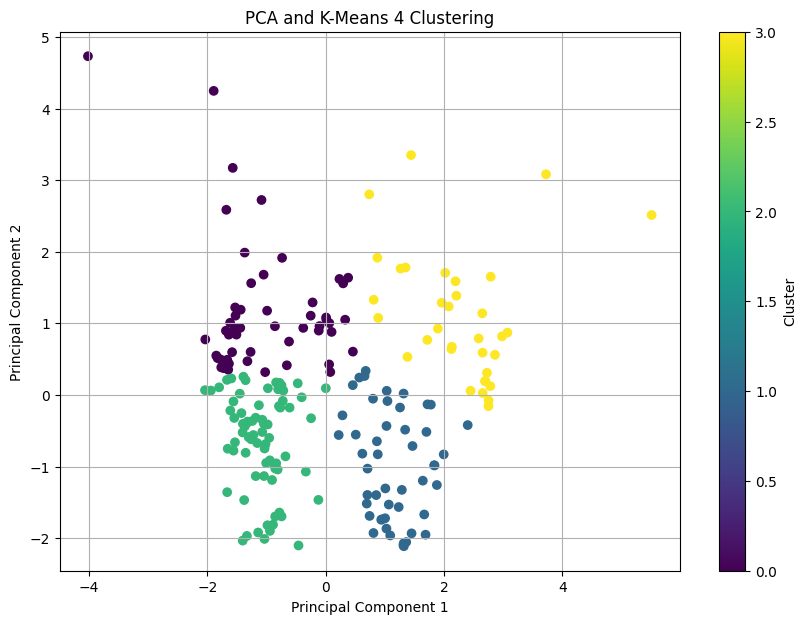

In [29]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster_4'], cmap='viridis', marker='o')
#for i, txt in enumerate(pca_df['Food']):
#    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means 4 Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [30]:
kmeans4 = KMeans(n_clusters=6, random_state=23)
kmeans4.fit(principal_components)
pca_df['Cluster_6'] = kmeans4.labels_

/Users/maxwellkreitman/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


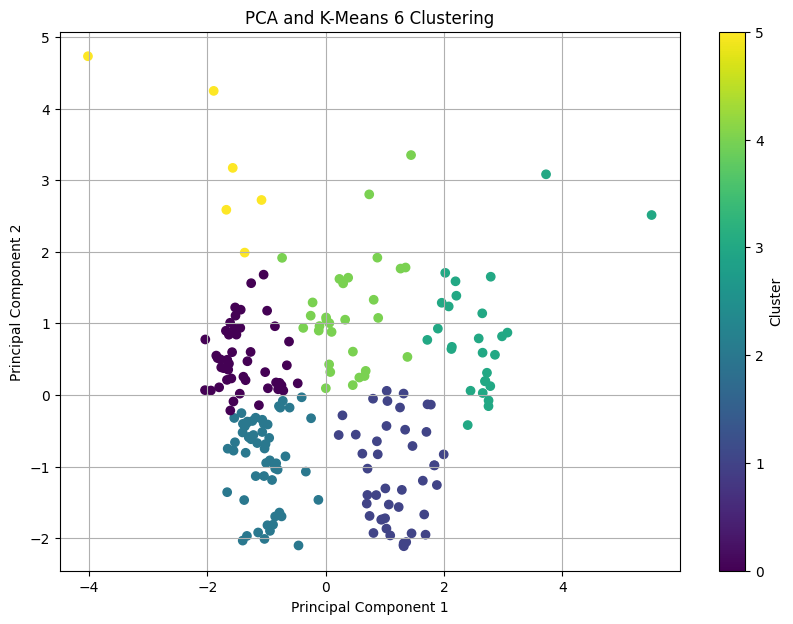

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster_6'], cmap='viridis', marker='o')
#for i, txt in enumerate(pca_df['Food']):
#    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means 6 Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [32]:
for cluster_id in range(n_clusters):
    cluster_records = pca_df[pca_df['Cluster_6'] == cluster_id]['Food']
    print(f"Records in Cluster {cluster_id}: {', '.join(cluster_records)}")

Records in Cluster 0: Cookie, Kind bar, Kind oats and honey, Clif bar, Granola, Snickers, Butterfinger, Twix, Belvita Dark Chocolate Crème Breakfast Sandwich, Favorite Day Milk Chocolate Covered Mini Grahams, Chocolate, Skratch Labs Energy Bar, Reese's Take 5, Ritter Sport Bar, Reese's Sticks, Kit Kat, Heath Bar, Skor Bar, Whatchamacallit, Roasted chickpeas, Falafel, Peanut M&Ms, TWIX Cookie Dough, 100 Grand Bar, Reese's Peanut Butter Pumpkin, Wispa, Nature's Valley Almond Butter Biscuit, Reese's Nutrageous, Nutter Butter, BOBO's Dipp'd Peanut Butter Oat Bar + Dark Chocolate, LARABAR Peanut Butter Chocolate Chip, KIND Salted Caramel Almond Flour Blondie Soft Baked Square, KIND Peanut Butter Almond Flour Blondie Soft Baked Square, Coffee cake, REESE'S Big Cup with Potato Chips King Size Peanut Butter Cups, REESE'S Big Cup with REESE'S PUFFS Cereal Milk Chocolate King Size Peanut Butter Cups, Peanut Butter M&Ms, LOTUS Biscoff Original, Blevita Marroni Sandwich, CRUNCH BAR, GOMACRO Double

In [33]:
n_clusters = 7
kmeans5 = KMeans(n_clusters=n_clusters, random_state=23)
kmeans5.fit(principal_components)
pca_df['Cluster_7'] = kmeans5.labels_

/Users/maxwellkreitman/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


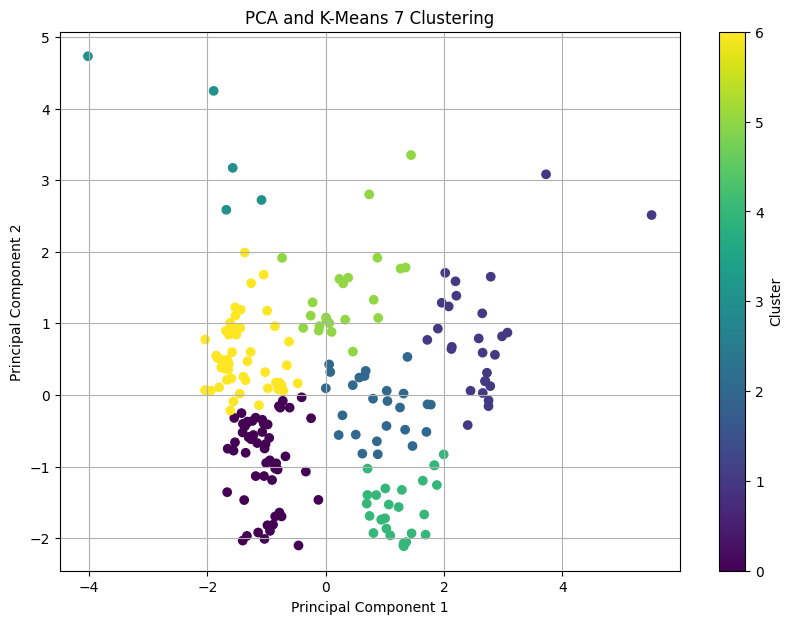

In [34]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster_7'], cmap='viridis', marker='o')
#for i, txt in enumerate(pca_df['Food']):
#    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means 7 Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [35]:
for cluster_id in range(n_clusters):
    cluster_records = pca_df[pca_df['Cluster_7'] == cluster_id]['Food']
    print(f"Records in Cluster {cluster_id + 1}: {', '.join(cluster_records)}\n")

Records in Cluster 1: Homemade oat bar 1, Homemade rice cake 1, Oats, Gatorade, Fig bar, Homemade oat bar 2, Tortilla, Kombucha, Zbar, 3 Musketeers, Quaker Big Chewy Chocolate Chip Granola Bars, Haribo Goldbears, Raisin Bran Crunch, Trader Joe's Chocolate Almond Biscotti, Trader Joe's Soft + Juicy Mango, Trader Joe's Dried Pineapple Rings, Trader Joe's Crystallized Candied Ginger Slices, Mike and Ikes, Dried Fruit, Corn flakes, Skratch Labs Rice Cake, Skratch Labs Energy Chews, Wiley Wallaby Watermelon Licorice, Milky Way, Bonne Maman Jam, Brach's Nips, Sun-Maid Vanilla Yogurt Covered Raisins, Nature's Bakery Whole Wheat Fig Bars, Bobo's Oat Bar, Nature's Bakery Oatmeal Crumble Bar, KIND Breakfast Bar, KIND Breakfast Cereal Bar, Rice Krispies Homestyle, Nature's Bakery Brownie, BOBO's Chocolate Chip Oat Bites, Made Good Soft Baked Cinnamon Bun Oat Bar, BOBO's Dipp'd Chocolate Oat Bar + Dark Chocolate, BOBO's Dipp'd Original Oat Bar + Dark Chocolate, BOBO's Apple Pie Stuff'd Oat Bites, 

In [36]:
n_clusters = 8
kmeans6 = KMeans(n_clusters=n_clusters, random_state=23)
kmeans6.fit(principal_components)
pca_df['Cluster_8'] = kmeans6.labels_

/Users/maxwellkreitman/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


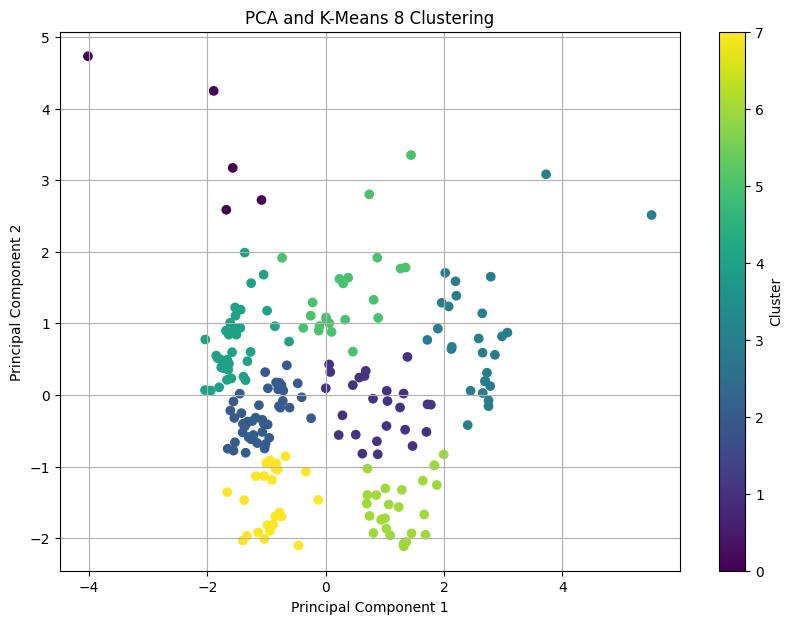

In [37]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster_8'], cmap='viridis', marker='o')
#for i, txt in enumerate(pca_df['Food']):
#    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means 8 Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [38]:
for cluster_id in range(n_clusters):
    cluster_records = pca_df[pca_df['Cluster_8'] == cluster_id]['Food']
    print(f"Records in Cluster {cluster_id + 1}: {', '.join(cluster_records)}\n")

Records in Cluster 1: Nuts, Mayonnaise, Olive oil, Food Club Trail Mix, Tahini

Records in Cluster 2: Carrot cake, Edamame, Sushi, Carb-conscious tortilla, Bread, CAVA Custom Salad, Ricotta cheese, Ice cream, Haagen-Dazs Vanilla Milk Chocolate Almond Ice Cream Bar, Tempeh, Hummus, Coconut milk, BEN & JERRY'S Peanut Butter World, Vegetarian Samosa, Pizza, TALENTI CARAMEL COOKIE CRUNCH GELATO, Green Curry Chicken, POWERBAR 30% Vanilla Coconut, POWERBAR 30% Chocolate, Tabbouleh, BEN & JERRY'S The Tonight Dough, Van Leeuwen Honeycomb Ice Cream, HAAGEN-DAZS Vanilla Bean Ice Cream, HAAGEN-DAZS Coffee Ice Cream, Labneh

Records in Cluster 3: Kind oats and honey, Homemade oat bar 1, Clif bar, Tortilla, Zbar, 3 Musketeers, Belvita Dark Chocolate Crème Breakfast Sandwich, Quaker Big Chewy Chocolate Chip Granola Bars, Favorite Day Milk Chocolate Covered Mini Grahams, Trader Joe's Chocolate Almond Biscotti, Milky Way, Brach's Nips, Sun-Maid Vanilla Yogurt Covered Raisins, Roasted chickpeas, Bobo's